# Relatório sobre Alinhamento de Sequências de DNA - Supercomputação

**Aluno: Antonio Vieira Fuziy**

**Professor: Luciano Silva**

___

Para realização do relatório, é necessário realizar uma contextualização sobre os três algoritmos tratados na atividade. Dentre eles estão os itens representados abaixo:

- Smith Waterman

A implementação do algoritmo de Smith Waterman se baseia mais em exploitation, utilizando um alinhamento local que gera todas as subsequências de todos os tamanhos e compara essas subsequências através de uma matriz, calculando a melhor pontuação possível sempre que uma subsequência comparada se apresenta melhor que as outras anteriores. 

- Busca Local

Para a implementação da busca local a ideia é um pouco diferente, esse algoritmo se baseia mais em exploration e em pouco exploitation, utilizando-se de uma aleatoriedade para gerar as subsequências de diferentes tamanhos, assim através dessas sequências aleatórias calcula-se a pontuação e monta-se as sequências A e B resultantes da melhor pontuação.

- Busca Exaustiva

Por fim, para a implementação da busca exaustiva a ideia é muito focada em exploration, dessa forma ele gera todas as possíveis subsequências a fim de conseguir encontrar a melhor pontuação a partir das duas sequências de entrada.

Bibliotecas para o código

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import time
import os
import subprocess
plt.style.use("ggplot")

Lista de algoritmos testados

In [2]:
algorithms = [
    "exaustive_search/exaustive_search",
    "exaustive_search/parallel_exaustive_search",
    "gpu/main"
]

input_directory = "./dna_sequences/all_sequences"

Função para rodar os executáveis de `C++`

In [3]:
def roda_com_entrada(executavel, algorithm):
  with open(algorithm) as f:
    start = time.perf_counter()
    proc = subprocess.run([executavel], input=f.read(), text=True, capture_output=True)
    end = time.perf_counter()
  return end-start

Função para geração de tempos dos algoritmos

In [4]:
def generate_time(algorithm, directory):
    tempos_busca = []
    dir_list = os.listdir(directory)
    for f in dir_list:
        tempos_busca.append(roda_com_entrada(algorithm,f'{directory}/{f}'))
    return tempos_busca, dir_list

Função para geração de tamanhos das sequências

In [5]:
def generate_length(directory, dir_list):
    n = []
    m = []
    for file in dir_list:
        with open(f'{directory}/{file}') as f :
            text_splitted = f.read().splitlines()
        n.append(text_splitted[0])
        m.append(text_splitted[1])
    n = [int(i) for i in n]
    m = [int(j) for j in m]
    # n.sort()
    # m.sort()
    return n, m

Executando os algoritmos para as entradas e salvando seus tempos e tamanhos de sequências

In [6]:
# tempos_exaustiva_sequencial, dir_exaustiva_sequencial = generate_time(algorithms[0], input_directory)
# n_exaustiva_sequencial, m_exaustiva_sequencial = generate_length(input_directory, dir_exaustiva_sequencial)

# tempos_exaustiva_parallel, dir_exaustiva_parallel  = generate_time(algorithms[1], input_directory)
# n_exaustiva_parallel, m_exaustiva_parallel = generate_length(input_directory, dir_exaustiva_parallel)

# tempos_exaustiva_gpu, dir_exaustiva_gpu  = generate_time(algorithms[2], input_directory)
# n_exaustiva_gpu, m_exaustiva_gpu = generate_length(input_directory, dir_exaustiva_gpu)

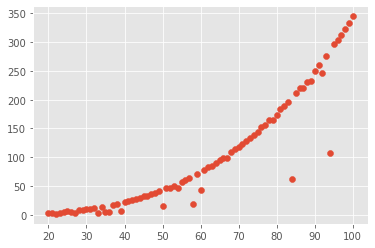

In [2]:

x = [27, 33, 22, 35, 94, 39, 58, 36, 50, 92, 26, 52, 84, 60, 54, 67, 32, 46, 89, 80, 73, 83, 41, 79, 23, 77, 75, 69, 25, 82, 55, 51, 53, 98, 78, 30, 56, 87, 61, 71, 44, 85, 37, 40, 100, 99, 68, 97, 20, 49, 93, 66, 91, 88, 74, 45, 72, 96, 47, 31, 29, 95, 90, 34, 42, 86, 70, 62, 28, 81, 43, 59, 21, 76, 65, 63, 48, 57, 24, 64, 38]
y = [2.719664598815143, 3.9932264941744506, 1.5543570863083005, 4.636197492945939, 108.12624888215214, 6.144551394041628, 19.092691592872143, 5.053228207863867, 15.168341133743525, 245.5220630718395, 5.163404838647693, 46.01605524402112, 61.7322190226987, 43.7503184559755, 47.25393664184958, 99.41283010132611, 11.827216199133545, 32.55966434394941, 232.1317806672305, 173.71312510501593, 132.91857767198235, 195.7787227667868, 24.295751288998872, 164.26168608199805, 3.2733968440443277, 156.28153295395896, 144.3441376159899, 113.70277460105717, 5.9661346799694, 189.13893646514043, 57.854081206955016, 46.231577932834625, 50.18840531958267, 322.85250507714227, 163.87243301980197, 9.849023303948343, 60.98061792179942, 220.82077348185703, 77.15499845519662, 123.81639023311436, 28.622532350942492, 212.25907621672377, 16.791027253959328, 22.628016400150955, 344.9794659279287, 332.9471331592649, 108.8372345957905, 313.14919026289135, 3.3196508958935738, 41.11246558604762, 276.0806724652648, 99.52588186785579, 260.1058387621306, 230.73063140409067, 138.5479226806201, 31.94631287595257, 127.4607613380067, 303.61314709996805, 36.30462520895526, 10.832470649853349, 8.997656183317304, 295.94695965899155, 249.22342199506238, 14.090915991924703, 26.080699515063316, 219.45090073905885, 117.0847452818416, 82.5250881346874, 8.157649222295731, 183.45589202595875, 27.937980213202536, 71.31218629563227, 3.779360691085458, 151.78923555882648, 95.17399123078212, 85.12458450905979, 38.654367009643465, 64.33353714784607, 5.342214883305132, 90.82532024988905, 19.456423357129097]
plt.scatter(x, y)
plt.show()

___

### Análise dos algoritmos

Utilizando os tempos de execução dos algoritmos e os tamanhos das sequências A e B geradas, é razoável realizar a análise e comparação dos comportamentos dos três algoritmos com sequências de vários tamanhos, assim abaixo foi exposto os gráfico 3D de **Tamanho da Sequência A X Tamanho da Sequência B X Tempo** para os algoritmos de Smith Waterman, Busca Local e Busca Exaustiva.

**Obs: Vale ressaltar que a análise foi realizada a partir de várias sequências de DNA de tamanhos diferentes, com o tamanho máximo de 300, e assim foi possível construir o relatório com análises mais aprofundadas.**

In [18]:
print(n_exaustiva_gpu)
print(tempos_exaustiva_gpu)

[27, 33, 22, 35, 94, 39, 58, 36, 50, 92, 26, 52, 84, 60, 54, 67, 32, 46, 89, 80, 73, 83, 41, 79, 23, 77, 75, 69, 25, 82, 55, 51, 53, 98, 78, 30, 56, 87, 61, 71, 44, 85, 37, 40, 100, 99, 68, 97, 20, 49, 93, 66, 91, 88, 74, 45, 72, 96, 47, 31, 29, 95, 90, 34, 42, 86, 70, 62, 28, 81, 43, 59, 21, 76, 65, 63, 48, 57, 24, 64, 38]
[2.719664598815143, 3.9932264941744506, 1.5543570863083005, 4.636197492945939, 108.12624888215214, 6.144551394041628, 19.092691592872143, 5.053228207863867, 15.168341133743525, 245.5220630718395, 5.163404838647693, 46.01605524402112, 61.7322190226987, 43.7503184559755, 47.25393664184958, 99.41283010132611, 11.827216199133545, 32.55966434394941, 232.1317806672305, 173.71312510501593, 132.91857767198235, 195.7787227667868, 24.295751288998872, 164.26168608199805, 3.2733968440443277, 156.28153295395896, 144.3441376159899, 113.70277460105717, 5.9661346799694, 189.13893646514043, 57.854081206955016, 46.231577932834625, 50.18840531958267, 322.85250507714227, 163.8724330198

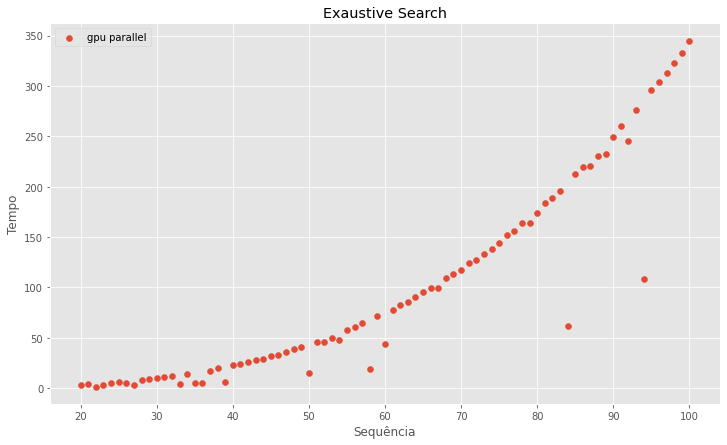

In [17]:
plt.figure(figsize=(12, 7))
# plt.scatter(n_exaustiva_sequencial, tempos_exaustiva_sequencial, label="sequential")
# plt.scatter(n_exaustiva_parallel, tempos_exaustiva_parallel, label="parallel")
plt.scatter(n_exaustiva_gpu, tempos_exaustiva_gpu, label="gpu parallel")
plt.title("Exaustive Search")
plt.xlabel('Sequência')
plt.ylabel("Tempo")
plt.legend()

plt.show()

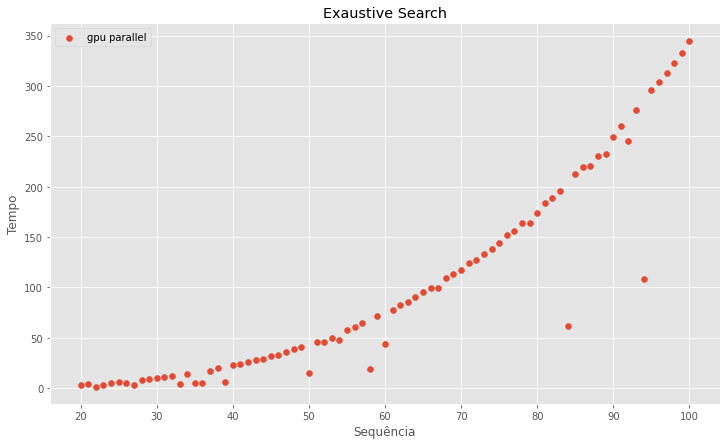

In [7]:
plt.figure(figsize=(12, 7))
# plt.scatter(n_exaustiva_sequencial, tempos_exaustiva_sequencial, label="sequential")
# plt.scatter(n_exaustiva_parallel, tempos_exaustiva_parallel, label="parallel")
plt.scatter(n_exaustiva_gpu, tempos_exaustiva_gpu, label="gpu parallel")
plt.title("Exaustive Search")
plt.xlabel('Sequência')
plt.ylabel("Tempo")
plt.legend()

plt.show()

Analisando os gráficos acima pode-se identificar alguns comportamentos por parte de cada algortimo:


- **Busca Exaustiva:**

O comportamento é mais visível, uma vez que a busca exaustiva gera todas as subsequências possíveis das entradas, dessa forma quanto maior o tamanho da entrada, maior o tamanho das subsequências geradas e assim maior o tempo de processamento para o cálculo da pontuação, portanto o gŕafico apresenta um comportamento exponencial, começando com cores mais escuras quando as sequências de entrada são menores e conforme o aumento delas, o gráfico tende a ficar mais clara, demonstrando o aumento do tempo de execução. 


___

### Profiling

Para uma análise dos tempos de execução e dos pontos de lentidão dos códigos utilizou-se o `valgrind`, dessa forma foi representado abaixo cada uma das análises dos três algoritmos (Smith Waterman, Busca Local e Busca Exaustiva).

- **Busca Exaustiva:**

![profiling busca_exaustiva](busca_exaustiva_valgrind.png)

Por fim, para implementação da busca exaustiva, espera-se que o processamento demore muito mais, visto que esse algoritmo gera todas as subsequências possíveis, dessa forma observando o profiling da busca exaustiva pode-se perceber que a maior lentidão do algoritmo está presente nos loops sobre as subsequências e no cálculo da pontuação da melhor subsequência, uma vez que existem 3 for's um dentro do outro nesse fragmento do código, gerando assim milhões de iterações do algortimo.